# Лабораторная работа №6 (аудио, часть 2)

Задача 1

При помощи любой библиотеки откройте файл blues.au и измените его таким образом, чтобы первые 5 секунд громкость нарастала (от 0 до исходного значения), следующие 5 секунд снижалась, затем снова нарастала и т.д. до конца записи.

In [ ]:
!pip install pydub

In [ ]:
import librosa
import librosa.display
import numpy as np
import soundfile as sf
from pydub import AudioSegment
import IPython.display as ipd
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
from scipy import signal

In [ ]:
# Загрузка аудиофайла
y, sr = librosa.load('blues.au')

# Вычисление длительности файла в секундах
duration = librosa.get_duration(y=y, sr=sr)

# Создание функции для изменения громкости
def change_volume(y, start, end):
    segment_duration = end - start
    volume_range = np.linspace(0, 1, int(sr * segment_duration))
    for i in range(int(sr * start), int(sr * end)):
        y[i] *= volume_range[i - int(sr * start)]

# Применение изменения громкости
for i in range(0, int(duration / 10) * 10, 10):
    change_volume(y, i, i + 5)
    change_volume(y, i + 5, i + 10)

# Сохранение измененного аудиофайла
sf.write('blues_changed.au', y, sr)
sf

<module 'soundfile' from '/usr/local/lib/python3.10/dist-packages/soundfile.py'>

Задача 2

При помощи любой библиотеки откройте файл manager.mp3 и сохраните его в трёх любых других форматах аудио.

In [ ]:
# чтение из файла
audio_mp3 = AudioSegment.from_mp3('/content/manager.mp3')

# сохраняем в другом формате
audio_mp3.export('result.wav', format='wav')
audio_mp3.export('result.flac', format='flac')
audio_mp3.export('result.ogg', format='ogg')

<_io.BufferedRandom name='result.ogg'>

Задача 3

На занятии мы генерировали синусоидальный сигнал при помощи самописной функции sine(). Сгенерируйте 7 сигналов, со значениями duration=2, sr=22050 и частотами 261, 293, 329, 349, 392, 440, 493 Гц. Объедините эти сигналы последовательно в один сигнал. Воспроизведите его и постройте его спектрограмму.

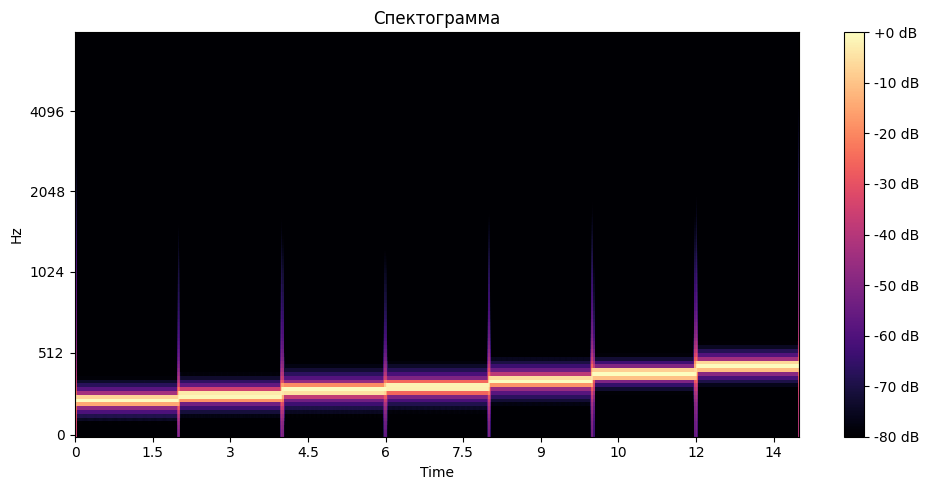

In [ ]:
def sine(duration, sr, frequency):
    t = np.linspace(0, duration, int(sr*duration), endpoint=False)
    signal = np.sin(2*np.pi*frequency*t)
    return signal

duration = 2
sr = 22050
frequencies = [261, 293, 329, 349, 392, 440, 493]

signals = [sine(duration, sr, f) for f in frequencies]

combined_signal = np.concatenate(signals)

# Сохраняем сгенерированный сигнал в файл формата WAV
write("combined_signal.wav", sr, combined_signal)

# Построение спектрограммы
S = librosa.feature.melspectrogram(y=combined_signal, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(10, 5))
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Спектограмма')
plt.tight_layout()

# Воспроизведение сигнала
ipd.Audio(combined_signal, rate=sr)


Задача 4

Постройте частотный спектр фразы “на практике” из аудиофайла manager.mp3.

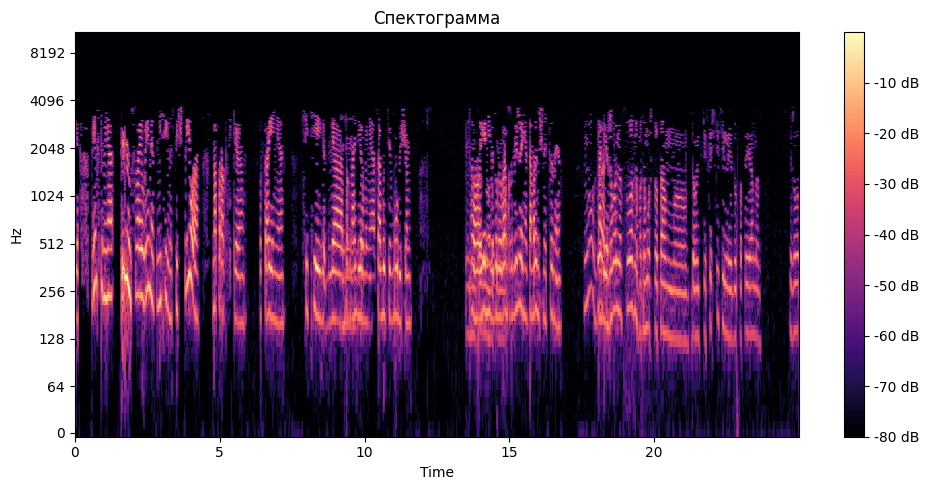

In [ ]:
# Загрузка аудиофайла
audio_path = "manager.mp3"
y, sr = librosa.load(audio_path)

# Получение спектрограммы звука
D = librosa.stft(y)
spec_power = librosa.amplitude_to_db(abs(D), ref=np.max)

# Построение частотного спектра
plt.figure(figsize=(10, 5))
librosa.display.specshow(spec_power, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Спектограмма')
plt.tight_layout()

plt.show()


Задача 5

Откройте файл manager.mp3 и постройте отдельные частотные спектры для каждого канала.

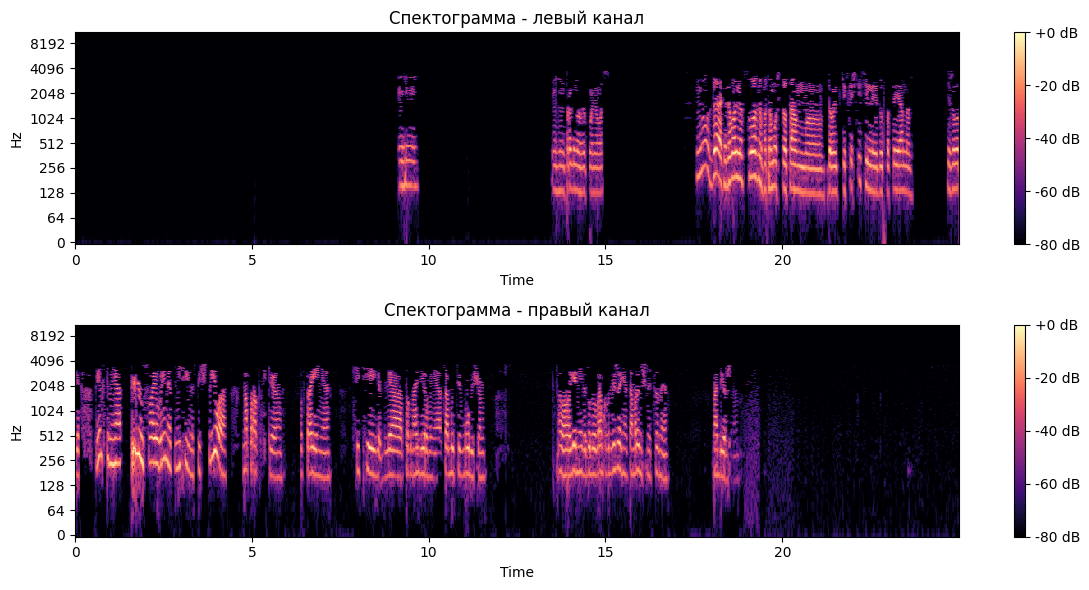

In [ ]:
# Загрузка аудиофайла
audio_path = "manager.mp3"
y, sr = librosa.load(audio_path, mono=False)  # Загружаем аудиофайл в стерео режиме

# Разделяем аудио на отдельные каналы
y_left = y[0]
y_right = y[1]

# Получение спектрограмм для каждого канала
D_left = librosa.stft(y_left)
spec_power_left = librosa.amplitude_to_db(abs(D_left), ref=np.max)

D_right = librosa.stft(y_right)
spec_power_right = librosa.amplitude_to_db(abs(D_right), ref=np.max)

# Построение частотных спектров для левого и правого каналов
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.specshow(spec_power_left, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Спектограмма - левый канал')

plt.subplot(2, 1, 2)
librosa.display.specshow(spec_power_right, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Спектограмма - правый канал')

plt.tight_layout()
plt.show()